In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.10.0


In [3]:
#columns = ["mic1", "mic2", "mic3", "mic4", "mic5", "angle"]

In [4]:
df = pd.read_csv("C:/Users/hank4/Documents/CEN598-Final-Project/CEN598-servo-rotation-data-collection/Dataset/raw_combined_data.csv")

In [5]:
df.head(6)

,mic1,mic2,mic3,mic4,mic5,angle
0,18.03,19.49,15.27,16.39,17.49,0
1,17.69,19.00,14.98,16.06,17.09,0
2,17.49,18.61,14.62,15.85,16.78,0
3,17.31,18.20,14.40,15.61,16.52,0
4,16.99,17.76,14.28,15.30,16.09,0
5,16.68,17.44,14.17,15.13,15.60,0


In [6]:
window_size = 10
no_of_rows = int(len(df)/window_size)
rows, cols = (no_of_rows, window_size)
mic1_window = [[0 for i in range(cols)] for j in range(rows)]
mic2_window = [[0 for i in range(cols)] for j in range(rows)]
mic3_window = [[0 for i in range(cols)] for j in range(rows)]
mic4_window = [[0 for i in range(cols)] for j in range(rows)]
mic5_window = [[0 for i in range(cols)] for j in range(rows)]
concatenated_window = [[0 for i in range((cols*5)+1)] for j in range(rows)]
np.shape(concatenated_window)

(14000, 51)

In [7]:
df['angle'] = df['angle'].map({'0':0, '36':1, '72':2, '108':3, '144':4, '180':5, 'silence':6})

In [8]:
k=-1
for i in range(0, no_of_rows):
    angle = 0
    for j in range(0, window_size):
        k=k+1
        mic1_window[i][j] = df["mic1"][k]
        mic2_window[i][j] = df["mic2"][k]
        mic3_window[i][j] = df["mic3"][k]
        mic4_window[i][j] = df["mic4"][k]
        mic5_window[i][j] = df["mic5"][k]
        concatenated_window[i][j] = mic1_window[i][j]
        concatenated_window[i][j+(window_size*1)] = mic2_window[i][j]
        concatenated_window[i][j+(window_size*2)] = mic3_window[i][j]
        concatenated_window[i][j+(window_size*3)] = mic4_window[i][j]
        concatenated_window[i][j+(window_size*4)] = mic5_window[i][j]
        angle = angle+df["angle"][k]
        #print(df["angle"][k])
    concatenated_window[i][j+(window_size*4)+1] = angle/window_size
#print(mic1_window)
#print(concatenated_window)

In [9]:
len(concatenated_window)

14000

In [10]:
i=1
j=1
"mic"+str(i)+"-"+str(j)

'mic1-1'

In [11]:
no_of_mics = 5
columns = []
for i in range(1, no_of_mics+1):
    for j in range(1, cols+1):
        columns.append("mic"+str(i)+"-"+str(j)) 
columns.append("angle")
print(columns)

['mic1-1', 'mic1-2', 'mic1-3', 'mic1-4', 'mic1-5', 'mic1-6', 'mic1-7', 'mic1-8', 'mic1-9', 'mic1-10', 'mic2-1', 'mic2-2', 'mic2-3', 'mic2-4', 'mic2-5', 'mic2-6', 'mic2-7', 'mic2-8', 'mic2-9', 'mic2-10', 'mic3-1', 'mic3-2', 'mic3-3', 'mic3-4', 'mic3-5', 'mic3-6', 'mic3-7', 'mic3-8', 'mic3-9', 'mic3-10', 'mic4-1', 'mic4-2', 'mic4-3', 'mic4-4', 'mic4-5', 'mic4-6', 'mic4-7', 'mic4-8', 'mic4-9', 'mic4-10', 'mic5-1', 'mic5-2', 'mic5-3', 'mic5-4', 'mic5-5', 'mic5-6', 'mic5-7', 'mic5-8', 'mic5-9', 'mic5-10', 'angle']


In [12]:
df = pd.DataFrame(concatenated_window, columns=columns)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mic1-1,14000.0,22.543159,5.355828,12.29,18.8700,22.160,25.6800,55.70
mic1-2,14000.0,22.541949,5.355679,12.27,18.8500,22.130,25.6325,55.14
mic1-3,14000.0,22.540286,5.351624,12.25,18.8600,22.170,25.6300,54.49
mic1-4,14000.0,22.541232,5.349516,12.24,18.8700,22.140,25.6200,54.34
mic1-5,14000.0,22.543414,5.348125,12.19,18.8700,22.130,25.6500,53.50
mic1-6,14000.0,22.543156,5.346725,12.30,18.8700,22.130,25.6400,55.48
mic1-7,14000.0,22.540519,5.347110,12.36,18.8775,22.160,25.6000,57.46
mic1-8,14000.0,22.540453,5.349225,12.31,18.9000,22.180,25.6200,57.71
mic1-9,14000.0,22.541802,5.351346,12.26,18.8800,22.160,25.6400,56.81
mic1-10,14000.0,22.542204,5.353049,12.27,18.9000,22.150,25.6600,56.00


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
X = df.drop('angle',axis=1).values
y = df['angle'].values

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [18]:
y_cat_train = to_categorical(y_train,7)

In [19]:
y_cat_test = to_categorical(y_test,7)

In [20]:
#from sklearn.preprocessing import MinMaxScaler

In [21]:
#scaler = MinMaxScaler()

In [22]:
#scaler.fit(X_train)

In [23]:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [24]:
'''print("min: ",scaler.min_)
print("scale: ",scaler.scale_)
print("data_min: ",scaler.data_min_)
print("data_max: ",scaler.data_max_)
print("n_features_in: ",scaler.n_features_in_)'''

'print("min: ",scaler.min_)\nprint("scale: ",scaler.scale_)\nprint("data_min: ",scaler.data_min_)\nprint("data_max: ",scaler.data_max_)\nprint("n_features_in: ",scaler.n_features_in_)'

In [25]:
X_train = X_train/1023.0
X_test = X_test/1023.0

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [27]:
X_train.shape

(11200, 50)

In [28]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))

model.add(Dense(units=7,activation='softmax'))

# For a multi-class classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(x=X_train, 
          y=y_cat_train, 
          epochs=400,
          batch_size = 1024,
          validation_data=(X_test, y_cat_test), verbose=1
          )

Epoch 1/400
11/11 [==============================] - 2s 134ms/step - loss: 1.9450 - accuracy: 0.1947 - val_loss: 1.9445 - val_accuracy: 0.1989
Epoch 2/400
11/11 [==============================] - 1s 118ms/step - loss: 1.9439 - accuracy: 0.1963 - val_loss: 1.9433 - val_accuracy: 0.1582
Epoch 3/400
11/11 [==============================] - 1s 97ms/step - loss: 1.9425 - accuracy: 0.1693 - val_loss: 1.9415 - val_accuracy: 0.1575
Epoch 4/400
11/11 [==============================] - 1s 117ms/step - loss: 1.9402 - accuracy: 0.1679 - val_loss: 1.9387 - val_accuracy: 0.2564
Epoch 5/400
11/11 [==============================] - 1s 104ms/step - loss: 1.9365 - accuracy: 0.2720 - val_loss: 1.9336 - val_accuracy: 0.2814
Epoch 6/400
11/11 [==============================] - 1s 130ms/step - loss: 1.9301 - accuracy: 0.3113 - val_loss: 1.9255 - val_accuracy: 0.3118
Epoch 7/400
11/11 [==============================] - 1s 107ms/step - loss: 1.9204 - accuracy: 0.2965 - val_loss: 1.9135 - val_accuracy: 0.3043


In [31]:
losses = pd.DataFrame(model.history.history)

In [32]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.944974,0.194732,1.944526,0.198929
1,1.943914,0.196250,1.943335,0.158214
2,1.942478,0.169286,1.941542,0.157500
3,1.940203,0.167946,1.938668,0.256429
4,1.936520,0.271964,1.933604,0.281429
...,...,...,...,...
395,0.707687,0.716607,0.688473,0.721786
396,0.708569,0.715357,0.688277,0.721429
397,0.706789,0.716161,0.686696,0.717143
398,0.707864,0.715714,0.689548,0.711071


<Axes: >

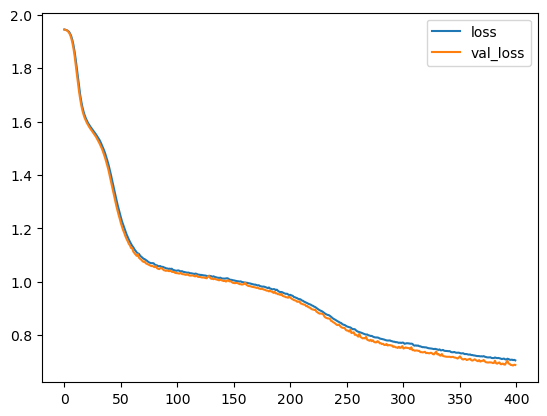

In [33]:
# loss --> Training loss, val_loss--> Test data loss
losses[['loss','val_loss']].plot()

<Axes: >

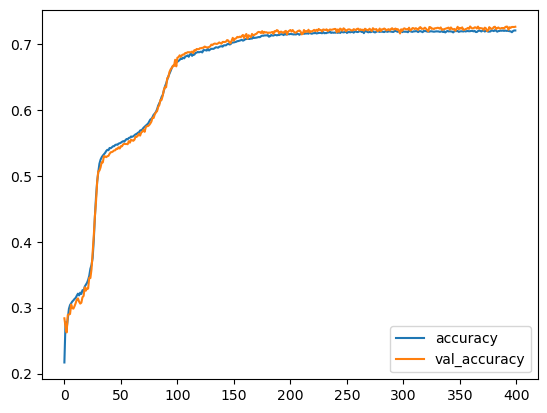

In [117]:
# acc --> accuracy of training data, val_acc --> accuracy of test data
losses[['accuracy','val_accuracy']].plot()

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
predictions = model.predict(X_test)

88/88 [==============================] - 0s 932us/step


In [36]:
#print(list(predictions))

In [37]:
predictions = map(lambda x: np.argmax(x), predictions)
predictions = list(predictions)
#print(predictions)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71       405
         1.0       0.64      0.62      0.63       427
         2.0       0.55      0.56      0.55       396
         3.0       0.70      0.63      0.66       372
         4.0       0.68      0.69      0.68       387
         5.0       0.84      0.80      0.82       415
         6.0       0.93      0.96      0.94       398

    accuracy                           0.72      2800
   macro avg       0.72      0.72      0.72      2800
weighted avg       0.72      0.72      0.72      2800



In [39]:
#list(predictions)

In [40]:
confusion_matrix(y_test,predictions)

array([[301,  54,  13,   2,   3,   9,  23],
       [ 83, 264,  76,   2,   0,   0,   2],
       [ 23,  91, 223,  43,   9,   4,   3],
       [  4,   2,  75, 235,  55,   1,   0],
       [  7,   0,   7,  55, 267,  51,   0],
       [ 18,   0,   2,   1,  60, 334,   0],
       [  2,   2,  13,   0,   0,   0, 381]], dtype=int64)

In [41]:
model.save("classification_model_20000_model1_input10.h5")

In [42]:
from tensorflow.keras.models import load_model
model1 = load_model("classification_model_20000_model1_input10.h5")

In [43]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model1) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('classification_model_20000_model1_input10.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\hank4\AppData\Local\Temp\tmp_df_lc33\assets


In [44]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="classification_model_20000_model1_input10.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
tflite_output_data = []

for i in range(len(X_test)):
    input_data = np.array(np.expand_dims(X_test[i], axis=0), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    
    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    tflite_output_data.append(output_data)
#print(tflite_output_data)

In [45]:
tflite_predictions = map(lambda x: np.argmax(x), tflite_output_data)
tf_lite_predictions = list(tflite_predictions)
#print(tf_lite_predictions)

In [46]:
confusion_matrix(y_test,tf_lite_predictions)

array([[301,  54,  13,   2,   3,   9,  23],
       [ 83, 264,  76,   2,   0,   0,   2],
       [ 23,  91, 223,  43,   9,   4,   3],
       [  4,   2,  75, 235,  55,   1,   0],
       [  7,   0,   7,  55, 267,  51,   0],
       [ 18,   0,   2,   1,  60, 334,   0],
       [  2,   2,  13,   0,   0,   0, 381]], dtype=int64)